## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
columns_to_drop = ['EIN', 'NAME']
new_df = application_df.drop(columns=columns_to_drop, axis=1)
new_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
new_df.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,34299.000000
mean,0.999854,2.769199e+06,0.532406
std,0.012073,8.713045e+07,0.498956
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,7.742000e+03,1.000000
max,1.000000,8.597806e+09,1.000000


In [4]:
# Determine the number of unique values in each column.
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [5]:
# Look at APPLICATION_TYPE value counts for binning
new_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17']

print(application_types_to_replace)

['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17']


In [7]:
# Replace in dataframe
for app in application_types_to_replace:
    new_df['APPLICATION_TYPE'] = new_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
new_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
new_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [9]:
# Look at CLASSIFICATION value counts for binning
new_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
classification_counts = new_df['CLASSIFICATION'].value_counts()
print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
greater_than_one = classification_counts[classification_counts > 1]
print(greater_than_one)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64


In [12]:
# Choose the cutoff value
cutoff_value = 300

# Count the occurrences of each classification
classification_counts = new_df['CLASSIFICATION'].value_counts()

# Create a list of classifications to be replaced
classifications_to_replace = list(classification_counts[classification_counts <= cutoff_value].index)

print(classifications_to_replace)

['C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300', 'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235', 'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260', 'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190', 'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900', 'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283', 'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500', 'C2150']


In [13]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#cutoff_value = 500
#classifications_to_replace = []

#print(classifications_to_replace)

# Replace in dataframe
for cls in classifications_to_replace:
    new_df['CLASSIFICATION'] = new_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
new_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [14]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(new_df)

print(application_dummies)

       STATUS   ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0           1      5000              1                       0   
1           1    108590              1                       0   
2           1      5000              0                       0   
3           1      6692              1                       0   
4           1    142590              1                       0   
...       ...       ...            ...                     ...   
34294       1      5000              0                       0   
34295       1      5000              0                       0   
34296       1      5000              0                       0   
34297       1      5000              1                       0   
34298       1  36500179              0                       0   

       APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                         1                     0                    0   
1                         0                     0          

In [16]:
# Split our preprocessed data into our features and target arrays

# Separate the target variable (output) from the features (input)
X = application_dummies.drop('IS_SUCCESSFUL', axis=1).values  # Features
y = application_dummies['IS_SUCCESSFUL'].values  # Target

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Get the input feature/ shape
X_train_scaled.shape

(27439, 44)

## Compile, Train and Evaluate the Model

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [20]:
# # Create a method that creates a new Sequential model with hyperparameter options
# def create_model(hp):
#     nn = tf.keras.models.Sequential()

#     # Allow kerastuner to decide which activation function to use in hidden layers
#     activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
#     # Allow kerastuner to decide number of neurons in first layer
#     nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
#         min_value=1,
#         max_value= 90,
#         step=5), activation=activation, input_dim=input_features))

#     # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
#     for i in range(hp.Int('num_layers', 1, 5)):
#         nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
#             min_value=1,
#             max_value=30,
#             step=5),
#             activation=activation))
    
#     nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#     # Compile the model
#     nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
#     return nn

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]

nn = tf.keras.models.Sequential()

# # First hidden layer
nn.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(input_features,)))

# Second hidden layer
# # Add more hidden layers (you can adjust the number of layers and nodes as needed)
# Second hidden layer with Leaky ReLU
nn.add(tf.keras.layers.Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
nn.add(tf.keras.layers.Dense(8, activation='relu'))
nn.add(tf.keras.layers.Dense(8, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1440      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2185 (8.54 KB)
Trainable params: 2185 (8.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Train the model
epochs = 100  # Number of training epochs (you can adjust this as needed)
batch_size = 10  # Number of samples per gradient update (you can adjust this as needed)

history = nn.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/100
2196/2196 [==============================] - 3s 1ms/step - loss: 0.5748 - accuracy: 0.7147 - val_loss: 0.5528 - val_accuracy: 0.7383
Epoch 2/100
2196/2196 [==============================] - 2s 1ms/step - loss: 0.5572 - accuracy: 0.7270 - val_loss: 0.5466 - val_accuracy: 0.7389
Epoch 3/100
2196/2196 [==============================] - 2s 1ms/step - loss: 0.5537 - accuracy: 0.7283 - val_loss: 0.5490 - val_accuracy: 0.7363
Epoch 4/100
2196/2196 [==============================] - 2s 1ms/step - loss: 0.5525 - accuracy: 0.7286 - val_loss: 0.5450 - val_accuracy: 0.7402
Epoch 5/100
2196/2196 [==============================] - 2s 1ms/step - loss: 0.5506 - accuracy: 0.7306 - val_loss: 0.5444 - val_accuracy: 0.7400
Epoch 6/100
2196/2196 [==============================] - 2s 1ms/step - loss: 0.5501 - accuracy: 0.7310 - val_loss: 0.5473 - val_accuracy: 0.7362
Epoch 7/100
2196/2196 [==============================] - 2s 1ms/step - loss: 0.5489 - accuracy: 0.7309 - val_loss: 0.5462 - val_ac

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5619 - accuracy: 0.7230 - 158ms/epoch - 735us/step
Loss: 0.5618605613708496, Accuracy: 0.7230320572853088


<AxesSubplot:>

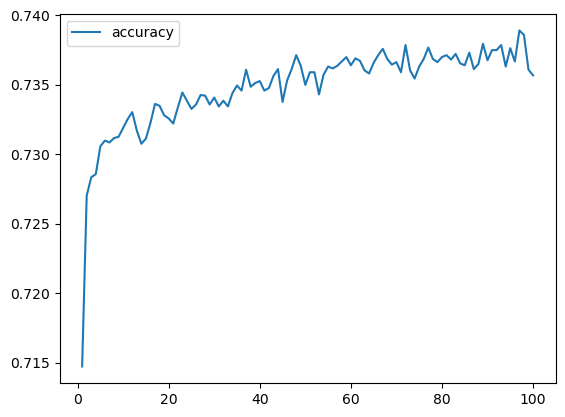

In [24]:
# plotting the accuracy
history_df = pd.DataFrame(history.history, index = range(1, len(history.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [ ]:
# plotting the loss
history_df = pd.DataFrame(history.history, index = range(1, len(history.history['loss'])+1))
history_df.plot(y = 'loss')

In [ ]:
# plotting the validation loss
history_df = pd.DataFrame(history.history, index = range(1, len(history.history['loss'])+1))
history_df.plot(y = 'val_loss')

In [ ]:
# plotting the validation accuracy
history_df = pd.DataFrame(history.history, index = range(1, len(history.history['loss'])+1))
history_df.plot(y = 'val_accuracy')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Create a DataFrame from the history dictionary
history_df = pd.DataFrame(history.history, index=range(1, len(history.history['loss']) + 1))

# Plot the 'accuracy' column
history_df.plot(y='accuracy')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')

# Save the plot as a PNG image
plt.savefig('accuracy_plot-opt-3.png')

# Show the plot (optional)
plt.show()

In [ ]:
# Export our model to HDF5 file
model_filename = 'AlphabetSoupCharity-opt-3.h5'
nn.save(model_filename)